# Bidirectional RNNs for IMDB sentiment prediction

## Goal

* Bidirection RNNs to design good fit model.
* For detail overview of data, please look at [the link](https://bit.ly/346w0IW)

## Data

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np

# As imdb.load_data() gave an error, found in stackoverflow following suggestions
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# Loading most frequently appeared words in top 10000, 
# which are already encoded into integer"""
print("INFO: Loading imdb dataset...")
(data_train, value_train), (data_test, value_test) = imdb.load_data(path="imdb.npz", num_words=10000)
print("INFO: # of training sequences %d" %len(data_train))
print("INFO: # of testing sequences %d" %len(data_test))

# Compute mean of sequence length of training dataset
ts_row_length = [len(ts_each_row) for ts_each_row in data_train]
print("INFO: training mean %0.2f and stdev %0.2f" %(np.mean(ts_row_length), np.std(ts_row_length)))
ts_row_length = [len(ts_each_row) for ts_each_row in data_test]
print("INFO: testing mean %0.2f and stdev %0.2f" %(np.mean(ts_row_length), np.std(ts_row_length)))

# Pad sequence
in_max_len = 400
data_train = sequence.pad_sequences(data_train, maxlen=in_max_len)
data_test = sequence.pad_sequences(data_test, maxlen=in_max_len)
print("INFO: train shape ", data_train.shape)
print("INFO: test shape ", data_test.shape)

Using TensorFlow backend.


INFO: Loading imdb dataset...
INFO: # of training sequences 25000
INFO: # of testing sequences 25000
INFO: training mean 238.71 and stdev 176.49
INFO: testing mean 230.80 and stdev 169.16
INFO: train shape  (25000, 400)
INFO: test shape  (25000, 400)


## Matplotlib setup

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

font      = {'family':'arial', 'style':'normal', 'size':18}
axis_font = {'family':'arial', 'style':'normal', 'size':18}
plt.rc('font', **font)

## Model

In [3]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding, LSTM, Dropout, Flatten, Dense, GRU, Bidirectional

## Long short-term memory (LSTM)

### 1. Tanh activation

In [4]:
# Architecture
model = Sequential()
model.add(Embedding(10000, 256))
model.add(Bidirectional(LSTM(128, activation='tanh')))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Fitting data
LSTM2Log = model.fit(data_train, value_train,
                       epochs=10,
                       batch_size=128,
                       validation_split=0.1)

# Testing accuracy of parameters
fo_loss, fo_accuracy = model.evaluate(data_test, value_test, batch_size=128)
print("Loss: %5.3f" %fo_loss)
print("Accuracy: %5.3f" %fo_accuracy)

W0822 18:28:05.216542 140156843624256 deprecation_wrapper.py:119] From /home/rojan/Kathmandu/Virtual/env/lib64/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 18:28:05.229808 140156843624256 deprecation_wrapper.py:119] From /home/rojan/Kathmandu/Virtual/env/lib64/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 18:28:05.231961 140156843624256 deprecation_wrapper.py:119] From /home/rojan/Kathmandu/Virtual/env/lib64/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0822 18:28:06.094620 140156843624256 deprecation_wrapper.py:119] From /home/rojan/Kathmandu/Virtual/env/lib64/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 2,954,497
Trainable params: 2,954,497
Non-trainable params: 0
_________________________________________________________________


W0822 18:28:08.135589 140156843624256 deprecation_wrapper.py:119] From /home/rojan/Kathmandu/Virtual/env/lib64/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 337s 15ms/step - loss: 0.4935 - acc: 0.7632 - val_loss: 0.3532 - val_acc: 0.8504
Epoch 2/10
22500/22500 [==============================] - 344s 15ms/step - loss: 0.3281 - acc: 0.8722 - val_loss: 0.3010 - val_acc: 0.8796
Epoch 3/10
22500/22500 [==============================] - 372s 17ms/step - loss: 0.2545 - acc: 0.9004 - val_loss: 0.3821 - val_acc: 0.8276
Epoch 4/10
22500/22500 [==============================] - 324s 14ms/step - loss: 0.2079 - acc: 0.9234 - val_loss: 0.3071 - val_acc: 0.8672
Epoch 5/10
22500/22500 [==============================] - 432s 19ms/step - loss: 0.1796 - acc: 0.9340 - val_loss: 0.3610 - val_acc: 0.8580
Epoch 6/10
22500/22500 [==============================] - 474s 21ms/step - loss: 0.1531 - acc: 0.9452 - val_loss: 0.3659 - val_acc: 0.8848
Epoch 7/10
22500/22500 [==============================] - 474s 21ms/step - loss: 0.1235 - acc: 0.9562 - val_loss: 0.3

W0822 19:40:14.375541 140156843624256 font_manager.py:1282] findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
W0822 19:40:15.332251 140156843624256 font_manager.py:1282] findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
W0822 19:40:15.351823 140156843624256 font_manager.py:1282] findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


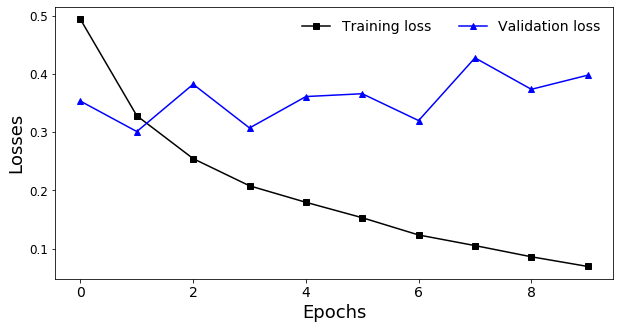

In [5]:
ts_tra_loss = LSTM2Log.history['loss']
ts_val_loss = LSTM2Log.history['val_loss']

ts_in_epochs = np.arange(0, len(ts_tra_loss))
fig = plt.figure(figsize=(10, 5))

plt.plot(ts_in_epochs, ts_tra_loss, 's-', color="k", label='Training loss')
plt.plot(ts_in_epochs, ts_val_loss, '^-', color="b", label='Validation loss')

ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

### 2. Sigmoid activation

In [6]:
# Architecture
model = Sequential()
model.add(Embedding(10000, 256))
model.add(Bidirectional(LSTM(128, activation='sigmoid')))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Fitting data
LSTM2Log = model.fit(data_train, value_train,
                       epochs=10,
                       batch_size=128,
                       validation_split=0.1)

# Testing accuracy of parameters
fo_loss, fo_accuracy = model.evaluate(data_test, value_test, batch_size=128)
print("Loss: %5.3f" % fo_loss)
print("Accuracy: %5.3f" % fo_accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 2,954,497
Trainable params: 2,954,497
Non-trainable params: 0
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 508s 23ms/step - loss: 0.6202 - acc: 0.6374 - val_loss: 0.8176 - val_acc: 0.5896
Epoch 2/10
22500/22500 [==============================] - 495s 22ms/step - loss: 0.4166 - acc: 0.8166 - val_loss: 0.4442 - val_acc: 0.8048
Epoch 3/10
22500/22500 [==============================] - 492s 22ms/s

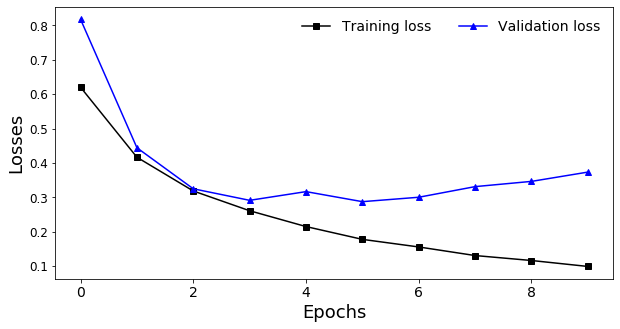

In [7]:
ts_tra_loss = LSTM2Log.history['loss']
ts_val_loss = LSTM2Log.history['val_loss']

ts_in_epochs = np.arange(0, len(ts_tra_loss))
fig = plt.figure(figsize=(10, 5))

plt.plot(ts_in_epochs, ts_tra_loss, 's-', color="k", label='Training loss')
plt.plot(ts_in_epochs, ts_val_loss, '^-', color="b", label='Validation loss')

ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

## Gated Recurrent Unit

### 1. Tanh activation

In [8]:
# Architecture
model = Sequential()
model.add(Embedding(10000, 256))
model.add(Bidirectional(GRU(128, activation='tanh')))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Fitting data
GRU2Log = model.fit(data_train, value_train,
                       epochs=10,
                       batch_size=128,
                       validation_split=0.1)

# Testing accuracy of parameters
fo_loss, fo_accuracy = model.evaluate(data_test, value_test, batch_size=128)
print("Loss: %5.3f" % fo_loss)
print("Accuracy: %5.3f" % fo_accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               295680    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 2,855,937
Trainable params: 2,855,937
Non-trainable params: 0
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 404s 18ms/step - loss: 0.4790 - acc: 0.7755 - val_loss: 0.3514 - val_acc: 0.8568
Epoch 2/10
22500/22500 [==============================] - 400s 18ms/step - loss: 0.3202 - acc: 0.8722 - val_loss: 0.3916 - val_acc: 0.8296
Epoch 3/10
22500/22500 [==============================] - 397s 18ms/s

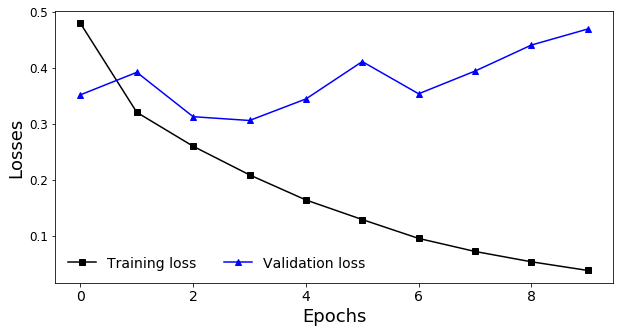

In [9]:
ts_tra_loss = GRU2Log.history['loss']
ts_val_loss = GRU2Log.history['val_loss']

ts_in_epochs = np.arange(0, len(ts_tra_loss))
fig = plt.figure(figsize=(10, 5))

plt.plot(ts_in_epochs, ts_tra_loss, 's-', color="k", label='Training loss')
plt.plot(ts_in_epochs, ts_val_loss, '^-', color="b", label='Validation loss')

ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

### 2. Sigmoid activation

In [10]:
# Architecture
model = Sequential()
model.add(Embedding(10000, 256))
model.add(Bidirectional(GRU(128, activation='sigmoid')))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Fitting data
GRUSigmoidLog = model.fit(data_train, value_train,
                           epochs=10,
                           batch_size=128,
                           validation_split=0.1)

# Testing accuracy of parameters
fo_loss, fo_accuracy = model.evaluate(data_test, value_test, batch_size=128)
print("Loss: %5.3f" % fo_loss)
print("Accuracy: %5.3f" % fo_accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 256)               295680    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 2,855,937
Trainable params: 2,855,937
Non-trainable params: 0
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 261s 12ms/step - loss: 0.6167 - acc: 0.6344 - val_loss: 0.4651 - val_acc: 0.7768
Epoch 2/10
22500/22500 [==============================] - 259s 12ms/step - loss: 0.3295 - acc: 0.8614 - val_loss: 0.2917 - val_acc: 0.8836
Epoch 3/10
22500/22500 [==============================] - 256s 11ms/s

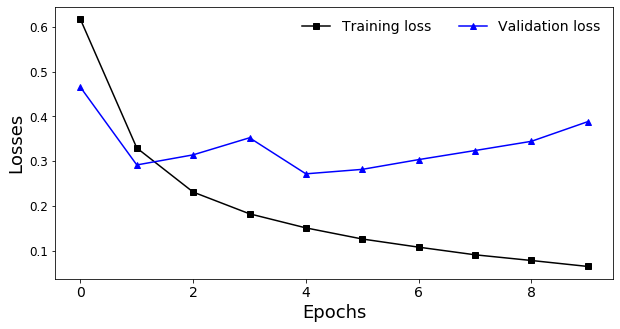

In [11]:
ts_tra_loss = GRUSigmoidLog.history['loss']
ts_val_loss = GRUSigmoidLog.history['val_loss']

ts_in_epochs = np.arange(0, len(ts_tra_loss))
fig = plt.figure(figsize=(10, 5))

plt.plot(ts_in_epochs, ts_tra_loss, 's-', color="k", label='Training loss')
plt.plot(ts_in_epochs, ts_val_loss, '^-', color="b", label='Validation loss')

ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

## RNN

### 1. Sigmoid activation

In [12]:
# Architecture
model = Sequential()
model.add(Embedding(10000, 256))
model.add(Bidirectional(SimpleRNN(128, activation='sigmoid')))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Fitting data
RNNSigmoidLog = model.fit(data_train, value_train,
                           epochs=10,
                           batch_size=128,
                           validation_split=0.1)

# Testing accuracy of parameters
fo_loss, fo_accuracy = model.evaluate(data_test, value_test, batch_size=128)
print("Loss: %5.3f" % fo_loss)
print("Accuracy: %5.3f" % fo_accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               98560     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 2,658,817
Trainable params: 2,658,817
Non-trainable params: 0
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 113s 5ms/step - loss: 0.6722 - acc: 0.5654 - val_loss: 0.6316 - val_acc: 0.6240
Epoch 2/10
22500/22500 [==============================] - 111s 5ms/step - loss: 0.5691 - acc: 0.6980 - val_loss: 0.5539 - val_acc: 0.7204
Epoch 3/10
22500/22500 [==============================] - 111s 5ms/step

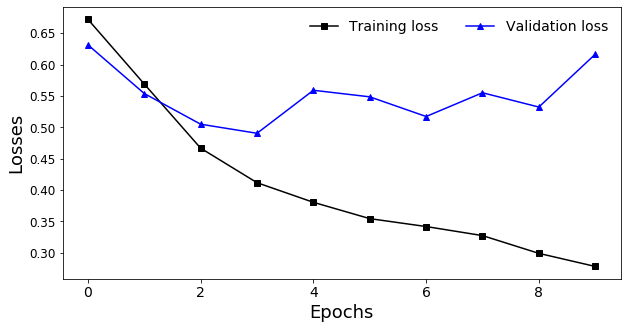

In [13]:
ts_tra_loss = RNNSigmoidLog.history['loss']
ts_val_loss = RNNSigmoidLog.history['val_loss']

ts_in_epochs = np.arange(0, len(ts_tra_loss))
fig = plt.figure(figsize=(10, 5))

plt.plot(ts_in_epochs, ts_tra_loss, 's-', color="k", label='Training loss')
plt.plot(ts_in_epochs, ts_val_loss, '^-', color="b", label='Validation loss')

ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

## 2. tahn activation

In [14]:
# Architecture
model = Sequential()
model.add(Embedding(10000, 256))
model.add(Bidirectional(SimpleRNN(128, activation='tanh')))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Fitting data
RNNTanhLog = model.fit(data_train, value_train,
                           epochs=10,
                           batch_size=128,
                           validation_split=0.1)

# Testing accuracy of parameters
fo_loss, fo_accuracy = model.evaluate(data_test, value_test, batch_size=128)
print("Loss: %5.3f" % fo_loss)
print("Accuracy: %5.3f" % fo_accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 256)               98560     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 2,658,817
Trainable params: 2,658,817
Non-trainable params: 0
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 114s 5ms/step - loss: 0.6697 - acc: 0.5813 - val_loss: 0.9520 - val_acc: 0.5428
Epoch 2/10
22500/22500 [==============================] - 112s 5ms/step - loss: 0.4666 - acc: 0.7882 - val_loss: 0.4288 - val_acc: 0.8280
Epoch 3/10
22500/22500 [==============================] - 112s 5ms/step

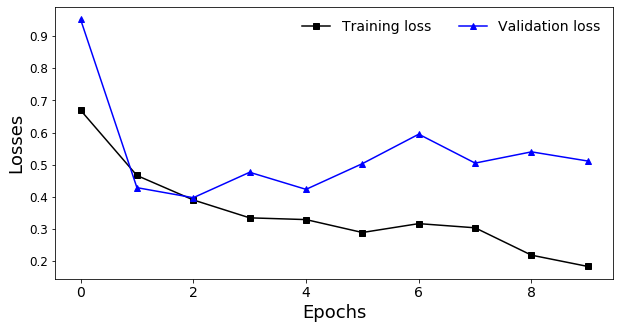

In [15]:
ts_tra_loss = RNNTanhLog.history['loss']
ts_val_loss = RNNTanhLog.history['val_loss']

ts_in_epochs = np.arange(0, len(ts_tra_loss))
fig = plt.figure(figsize=(10, 5))

plt.plot(ts_in_epochs, ts_tra_loss, 's-', color="k", label='Training loss')
plt.plot(ts_in_epochs, ts_val_loss, '^-', color="b", label='Validation loss')

ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

Nonetheless, the loss functions follows the similar trend as in single layer models; therefore, the performance is not changed.